# Process data and compare populations.
(for now just histograms)

###### Import libraries and imported data from last program

In [ ]:
# general comments:  some code could be way more efficient.  will clean up what i know
# some is just hodge podge, got to work

# comment to bsh:
#  - check vars again.  more diff variables

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

df15 = pd.read_pickle('Ref15_merged')
df09 = pd.read_pickle('Ref09_merged')


In [4]:
# combine two years into one dataset


frames = [df09, df15]
df_2y = pd.concat(frames)

#### Recode vars:  

In [ ]:
########################################33
#
# should be overwriting more.  will when everything works.
# habit from SAS
#
##############################33

# another group?  discouraged worker.  not in the labor force
# when .subtract .sum .asb vs df[0]+df[1]


# Cant float NA to int.
# what do I do about nas everywhere?  convert to 0s.  create sep datasets and drop out of analysis.




In [6]:
'''
1. Create main analysis variable:  Unemployment classification: employed, long-term unemployed, short-term unemployed
1. Change format to numeric so we can analyze we will use in analysis
2. Rename analysis variables to more easily understand in later anlaysis
'''

# just found.  need to slowly read through codebook.  am i missing something else?
# weighting?

#lkweeks :  weeks looking if employed in last year
#nwlkwk :  weeks looking if not employed in last year

df_2y['nwlkwk2'] = df_2y['nwlkwk'].astype('float')
df_2y['lkweeks2'] = df_2y['lkweeks'].astype('float')

df_2y['UnempWks'] = df_2y['nwlkwk2'] + df_2y['lkweeks2']


# Create Long Term Unemployed variable to compare populations
df_2y['LTunemp'] = np.where(df_2y['UnempWks']>=27, 'yes', 'no')
df_2y['LTunempN'] = np.where(df_2y['UnempWks']>=27, 1, 0)


df_2y.loc[df_2y['UnempWks'] >=27,'Emp_Group2'] = 'LongTerm'
df_2y.loc[(df_2y['UnempWks'] <27) & (df_2y['UnempWks'] >=1),'Emp_Group2'] = 'ShortTerm'
df_2y.loc[df_2y['UnempWks'] ==0,'Emp_Group2'] = 'Emped'


# check for outliers and missing or wierd values
#df_2y.loc[df_2y['UnempWks'].isna,'Emp_Group2'] = pd.isna
#df_2y.describe()


In [7]:
# 1.1. Rename family numeric variables

df_2y['NumPerFam']=df_2y['fpersons']
df_2y['wagesFamInc']=df_2y['fwsval']
df_2y['FoodStmpAmt']=df_2y['f_mv_fs']
df_2y['SchoolLunAmt']=df_2y['f_mv_sl']
df_2y['HealthPrem']=df_2y['fhip_val']
df_2y['HealthOutPock']=df_2y['fmoop']


In [8]:
# 1.2.  Rename and reformat Numeric fam variables

df_2y['FamType'] = df_2y['ftype'].astype('str')
df_2y['ChildLesTh6'] = df_2y['fownu6'].astype('str')
df_2y['RelChildLesTh6'] = df_2y['frelu6'].astype('str')
df_2y['RelChildLesTh18'] = df_2y['frelu18'].astype('str')
df_2y['IncPercntFam'] = df_2y['fpctcut'].astype('str')
df_2y['FamIncVsPov'] = df_2y['famlis'].astype('str')

# yes no dummie vars.  do they receive $$ from these sources
# are continuous a better choice?
df_2y['wages'] = df_2y['finc_ws'].astype('str')
df_2y['UnempComp'] = df_2y['finc_uc'].astype('str')
df_2y['WorkComp'] = df_2y['finc_wc'].astype('str')
df_2y['welfare'] = df_2y['finc_paw'].astype('str')
df_2y['VetBen'] = df_2y['finc_vet'].astype('str')
df_2y['DisabBen'] = df_2y['finc_dis'].astype('str')
df_2y['ChildSup'] = df_2y['finc_csp'].astype('str')


In [9]:
# 1.3. Recode values of family categorical variables (for format and analysis)

df_2y.loc[df_2y['FamType'] == '1', 'FamType2'] = "Primary family"
df_2y.loc[df_2y['FamType'] == '2', 'FamType2'] = "Nonfamily householder"
df_2y.loc[df_2y['FamType'] == '3', 'FamType2'] = "Related subfamily"
df_2y.loc[df_2y['FamType'] == '4', 'FamType2'] = "Unrelated subfamily"
df_2y.loc[df_2y['FamType'] == '5', 'FamType2'] = "Secondary individual"
df_2y.loc[df_2y['ChildLesTh6'] == '0.0', 'ChildLesTh62'] = "None, not in universe"
df_2y.loc[df_2y['ChildLesTh6'] == '1.0', 'ChildLesTh62'] = "1"
df_2y.loc[df_2y['ChildLesTh6'] == '2.0', 'ChildLesTh62'] = "2"
df_2y.loc[df_2y['ChildLesTh6'] == '3.0', 'ChildLesTh62'] = "3"
df_2y.loc[df_2y['ChildLesTh6'] == '4.0', 'ChildLesTh62'] = "4"
df_2y.loc[df_2y['ChildLesTh6'] == '5.0', 'ChildLesTh62'] = "5"
df_2y.loc[df_2y['ChildLesTh6'] == '6.0', 'ChildLesTh62'] = "6+"
df_2y.loc[df_2y['RelChildLesTh6'] == '3.0', 'RelChildLesTh62'] = "3"
df_2y.loc[df_2y['RelChildLesTh6'] == '4.0', 'RelChildLesTh62'] = "4"
df_2y.loc[df_2y['RelChildLesTh6'] == '5.0', 'RelChildLesTh62'] = "5"
df_2y.loc[df_2y['RelChildLesTh6'] == '6.0', 'RelChildLesTh62'] = "6"
df_2y.loc[df_2y['RelChildLesTh6'] == '7.0', 'RelChildLesTh62'] = "7"
df_2y.loc[df_2y['RelChildLesTh6'] == '8.0', 'RelChildLesTh62'] = "8"
df_2y.loc[df_2y['RelChildLesTh6'] == '9.0', 'RelChildLesTh62'] = "9+"
df_2y.loc[df_2y['RelChildLesTh18'] == '0.0', 'RelChildLesTh182'] = "NIU (FTYPE=2+)"
df_2y.loc[df_2y['RelChildLesTh18'] == '1.0', 'RelChildLesTh182'] = "Lowest 5 percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '2.0', 'RelChildLesTh182'] = "Second 5 percent "
df_2y.loc[df_2y['RelChildLesTh18'] == '3.0', 'RelChildLesTh182'] = "3rd percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '4.0', 'RelChildLesTh182'] = "4th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '5.0', 'RelChildLesTh182'] = "5th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '6.0', 'RelChildLesTh182'] = "6th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '7.0', 'RelChildLesTh182'] = "7th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '8.0', 'RelChildLesTh182'] = "8th percent"
df_2y.loc[df_2y['RelChildLesTh18'] == '9.0', 'RelChildLesTh182'] = "9th percent"
df_2y.loc[df_2y['IncPercntFam'] == '10.0', 'IncPercntFam2'] = "10th percent"
df_2y.loc[df_2y['IncPercntFam'] == '11.0', 'IncPercntFam2'] = "11th percent"
df_2y.loc[df_2y['IncPercntFam'] == '12.0', 'IncPercntFam2'] = "12th percent"
df_2y.loc[df_2y['IncPercntFam'] == '13.0', 'IncPercntFam2'] = "13th percent"
df_2y.loc[df_2y['IncPercntFam'] == '14.0', 'IncPercntFam2'] = "14th percent"
df_2y.loc[df_2y['IncPercntFam'] == '15.0', 'IncPercntFam2'] = "15th percent"
df_2y.loc[df_2y['IncPercntFam'] == '16.0', 'IncPercntFam2'] = "16th percent"
df_2y.loc[df_2y['IncPercntFam'] == '17.0', 'IncPercntFam2'] = "17th percent"
df_2y.loc[df_2y['IncPercntFam'] == '18.0', 'IncPercntFam2'] = "18th percent"
df_2y.loc[df_2y['IncPercntFam'] == '19.0', 'IncPercntFam2'] = "19th percent"
df_2y.loc[df_2y['IncPercntFam'] == '20.0', 'IncPercntFam2'] = "Top 5 percent"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Below low-income level"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "100 - 124 percent of the low- income level"
df_2y.loc[df_2y['IncPercntFam'] == '3.0', 'IncPercntFam2'] = "125 - 149 percent of the low- income level"
df_2y.loc[df_2y['IncPercntFam'] == '4.0', 'IncPercntFam2'] = "150 percent and above the low-income level"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Yes"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "No Dollar amount"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Yes"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "No"
df_2y.loc[df_2y['IncPercntFam'] == '1.0', 'IncPercntFam2'] = "Yes"
df_2y.loc[df_2y['IncPercntFam'] == '2.0', 'IncPercntFam2'] = "No"
df_2y.loc[df_2y['FamIncVsPov'] == '1.0', 'FamIncVsPov2'] = "Yes"
df_2y.loc[df_2y['FamIncVsPov'] == '2.0', 'FamIncVsPov2'] = "No"
df_2y.loc[df_2y['FamIncVsPov'] == '1.0', 'FamIncVsPov2'] = "Yes"
df_2y.loc[df_2y['FamIncVsPov'] == '2.0', 'FamIncVsPov2'] = "No"


# Yes and No = recode to make it easier later


In [10]:
## ?? these look like numeric vaariables.
# 1.X??
'''
df_2y.loc[df_2y['wages'] == '.0', 'wages2'] = "Wage and salary"
df_2y.loc[df_2y['wages'] == '.0', 'wages2'] = "Wage and salary"
df_2y.loc[df_2y['UnempComp'] == '.0', 'UnempComp2'] = "Unemployment compensation"
df_2y.loc[df_2y['UnempComp'] == '.0', 'UnempComp2'] = "Unemployment compensation"
df_2y.loc[df_2y['WorkComp'] == '.0', 'WorkComp2'] = "Worker's compensation"
df_2y.loc[df_2y['WorkComp'] == '.0', 'WorkComp2'] = "Worker's compensation"
df_2y.loc[df_2y['welfare'] == '.0', 'welfare2'] = "Public assistance or welfare benefits"
df_2y.loc[df_2y['welfare'] == '.0', 'welfare2'] = "Public assistance or welfare benefits"
df_2y.loc[df_2y['VetBen'] == '.0', 'VetBen2'] = "Veterans' Benefits"
df_2y.loc[df_2y['VetBen'] == '.0', 'VetBen2'] = "Veterans' Benefits"
df_2y.loc[df_2y['DisabBen'] == '.0', 'DisabBen2'] = "Disability payments"
df_2y.loc[df_2y['DisabBen'] == '.0', 'DisabBen2'] = "Disability payments"
df_2y.loc[df_2y['ChildSup'] == '.0', 'ChildSup2'] = "Child support payments"
df_2y.loc[df_2y['ChildSup'] == '.0', 'ChildSup2'] = "Child support payments"

'''

'\ndf_2y.loc[df_2y[\'wages\'] == \'.0\', \'wages2\'] = "Wage and salary"\ndf_2y.loc[df_2y[\'wages\'] == \'.0\', \'wages2\'] = "Wage and salary"\ndf_2y.loc[df_2y[\'UnempComp\'] == \'.0\', \'UnempComp2\'] = "Unemployment compensation"\ndf_2y.loc[df_2y[\'UnempComp\'] == \'.0\', \'UnempComp2\'] = "Unemployment compensation"\ndf_2y.loc[df_2y[\'WorkComp\'] == \'.0\', \'WorkComp2\'] = "Worker\'s compensation"\ndf_2y.loc[df_2y[\'WorkComp\'] == \'.0\', \'WorkComp2\'] = "Worker\'s compensation"\ndf_2y.loc[df_2y[\'welfare\'] == \'.0\', \'welfare2\'] = "Public assistance or welfare benefits"\ndf_2y.loc[df_2y[\'welfare\'] == \'.0\', \'welfare2\'] = "Public assistance or welfare benefits"\ndf_2y.loc[df_2y[\'VetBen\'] == \'.0\', \'VetBen2\'] = "Veterans\' Benefits"\ndf_2y.loc[df_2y[\'VetBen\'] == \'.0\', \'VetBen2\'] = "Veterans\' Benefits"\ndf_2y.loc[df_2y[\'DisabBen\'] == \'.0\', \'DisabBen2\'] = "Disability payments"\ndf_2y.loc[df_2y[\'DisabBen\'] == \'.0\', \'DisabBen2\'] = "Disability payments"\

In [11]:
# 2.1. Rename haus numeric variables

df_2y['Wages']=df_2y['hwsval']
df_2y['Uiearn']=df_2y['hucval']
df_2y['WorkComp']=df_2y['hwcval']
df_2y['ssSocSec']=df_2y['hssval']
df_2y['SuppInc']=df_2y['hssival']
df_2y['PubAsst']=df_2y['hpawval']
df_2y['VetPay']=df_2y['hvetval']
df_2y['survivorPay']=df_2y['hsurval']
df_2y['diabPay']=df_2y['hdisval']
df_2y['RetireInc']=df_2y['hretval']
df_2y['InterestInc']=df_2y['hintval']
df_2y['DivInc']=df_2y['hdivval']
df_2y['EdInc']=df_2y['hedval']
df_2y['ChSupp']=df_2y['hcspval']
df_2y['FinAssInc']=df_2y['hfinval']
df_2y['OthInc']=df_2y['hoival']


# 1.2.  Rename and reformat (convert dtype to str) haus numeric fam variables

df_2y['Wages'] = df_2y['hwsval'].astype('str')
df_2y['Uiearn'] = df_2y['hucval'].astype('str')
df_2y['WorkComp'] = df_2y['hwcval'].astype('str')
df_2y['ssSocSec'] = df_2y['hssval'].astype('str')
df_2y['SuppInc'] = df_2y['hssival'].astype('str')
df_2y['PubAsst'] = df_2y['hpawval'].astype('str')
df_2y['VetPay'] = df_2y['hvetval'].astype('str')
df_2y['survivorPay'] = df_2y['hsurval'].astype('str')
df_2y['diabPay'] = df_2y['hdisval'].astype('str')
df_2y['RetireInc'] = df_2y['hretval'].astype('str')
df_2y['InterestInc'] = df_2y['hintval'].astype('str')
df_2y['DivInc'] = df_2y['hdivval'].astype('str')
df_2y['EdInc'] = df_2y['hedval'].astype('str')
df_2y['ChSupp'] = df_2y['hcspval'].astype('str')
df_2y['FinAssInc'] = df_2y['hfinval'].astype('str')
df_2y['OthInc'] = df_2y['hoival'].astype('str')


#df_2y['hausHldTyp1'].describe()
#df_2y['LivPlaceType'].head()

In [12]:
# 2.3. Recode values of family categorical variables (for format and analysis)
# to make more sense for later analysis


#df_2y['MetroSize'] = df_2y['gtcbsasz'].astype('str')


df_2y['hausHldTyp1'] = df_2y['h_type'].astype('str')
df_2y['LivPlaceType'] = df_2y['h_livqrt'].astype('str')
df_2y['CountyFIPS'] = df_2y['gtco'].astype('str')
df_2y['City'] = df_2y['gtindvpc'].astype('str')
df_2y['HausStatus'] = df_2y['hhstatus'].astype('str')
df_2y['hhIncPerctiles'] = df_2y['htop5pct'].astype('str')
df_2y['hhIncPerctiles2'] = df_2y['hpctcut'].astype('str')
df_2y['Hhtype2'] = df_2y['hrhtype'].astype('str')

#? df_2y.loc[df_2y['MetroSize'] == '0.0', 'MetroSize2'] = "Not identified or nonmetropolitan"


df_2y.loc[df_2y['hausHldTyp1'] == '1', 'hausHldTyp12'] = "Husband/wife primary family (neither husband or wife in"
df_2y.loc[df_2y['hausHldTyp1'] == '2', 'hausHldTyp12'] = "Husband/wife primary family (husband and/or wife in"
df_2y.loc[df_2y['hausHldTyp1'] == '3', 'hausHldTyp12'] = "Unmarried civilian male primary family householder"
df_2y.loc[df_2y['hausHldTyp1'] == '4', 'hausHldTyp12'] = "Unmarried civilian female primary family householder"
df_2y.loc[df_2y['hausHldTyp1'] == '5', 'hausHldTyp12'] = "Primary family household - reference person in"
df_2y.loc[df_2y['hausHldTyp1'] == '6', 'hausHldTyp12'] = "Civilian male nonfamily householder"
df_2y.loc[df_2y['hausHldTyp1'] == '7', 'hausHldTyp12'] = "Civilian female nonfamily householder"
df_2y.loc[df_2y['hausHldTyp1'] == '8', 'hausHldTyp12'] = "Nonfamily householder household-reference person in"

df_2y.loc[df_2y['LivPlaceType'] == '01', 'LivPlaceType2'] = "House, apt"
df_2y.loc[df_2y['LivPlaceType'] == '02', 'LivPlaceType2'] = "HU in nontransient hotel, etc"
df_2y.loc[df_2y['LivPlaceType'] == '03', 'LivPlaceType2'] = "HU, perm,  in trans"
df_2y.loc[df_2y['LivPlaceType'] == '04', 'LivPlaceType2'] = "HU in rooming house"
df_2y.loc[df_2y['LivPlaceType'] == '05', 'LivPlaceType2'] = "Mobile home or trailer with no"
df_2y.loc[df_2y['LivPlaceType'] == '06', 'LivPlaceType2'] = "Mobile home or trailer with 1"
df_2y.loc[df_2y['LivPlaceType'] == '07', 'LivPlaceType2'] = "HU not specified above"
df_2y.loc[df_2y['LivPlaceType'] == '08', 'LivPlaceType2'] = "Qtrs not hu in rooming or"
df_2y.loc[df_2y['LivPlaceType'] == '09', 'LivPlaceType2'] = "Unit not perm in trans"
df_2y.loc[df_2y['LivPlaceType'] == '10', 'LivPlaceType2'] = "Tent or trailer site"
df_2y.loc[df_2y['LivPlaceType'] == '11', 'LivPlaceType2'] = "Student quarters in college"
df_2y.loc[df_2y['LivPlaceType'] == '12', 'LivPlaceType2'] = "Other not HU"

df_2y.loc[df_2y['HausStatus'] == '0', 'HausStatus2'] = "Not in universe (group quarters)"
df_2y.loc[df_2y['HausStatus'] == '2', 'HausStatus2'] = "Nonfamily householder living alone"
df_2y.loc[df_2y['HausStatus'] == '3', 'HausStatus2'] = "Nonfamily householder living with nonrelatives"
df_2y.loc[df_2y['hhIncPerctiles'] == '1', 'hhIncPerctiles2'] = "Widowed"
df_2y.loc[df_2y['hhIncPerctiles2'] == '2', 'hhIncPerctiles22'] = "Divorced"
df_2y.loc[df_2y['Hhtype2'] == '00', 'Hhtype22'] = "Separated"
df_2y.loc[df_2y['Hhtype2'] == '31', 'Hhtype22'] = "Never married"
df_2y.loc[df_2y['Hhtype2'] == '32', 'Hhtype22'] = "Married - civilian spouse present"
df_2y.loc[df_2y['Hhtype2'] == '33', 'Hhtype22'] = "Married - AF spouse present"
df_2y.loc[df_2y['Hhtype2'] == '34', 'Hhtype22'] = "Married - spouse absent (exc. separated)"
df_2y.loc[df_2y['Hhtype2'] == '35', 'Hhtype22'] = "Widowed"
df_2y.loc[df_2y['Hhtype2'] == '36', 'Hhtype22'] = "Divorced"
df_2y.loc[df_2y['Hhtype2'] == '37', 'Hhtype22'] = "Separated"
df_2y.loc[df_2y['Hhtype2'] == '38', 'Hhtype22'] = "Never married"
df_2y.loc[df_2y['Hhtype2'] == '39', 'Hhtype22'] = "Married - civilian spouse present"


In [13]:
########################################
########################################
## do i need to drop nas? 
########################################
########################################



In [14]:
### all analyses:
# what percent of 
# do I get my axises right?
# which vars X, which var right?

In [15]:

# Percentages -  #
# DO THIS IF TOO MANY CATEGORIES TO GRAPH

# should make tabel the other way.
# also some graphs hard to read/see differences if emp group is on X axis.  e.g. FamType2
# also see other stat like difference when make tables?  Or do it this way?

In [16]:
# Table 1.  distribution of category group within each emp groups
# Use tables when too many categories to fit on one graph 


In [ ]:
########################################
########################################
## would like to sort this -- HELP!!!!!!
########################################
########################################

In [17]:

#1. Table Percent of emp group belongs to each categorical group

df_FamType_2y=df_2y
LT_FamType2=df_FamType_2y.loc[:,['Emp_Group2','FamType2']]


pt2=pd.pivot_table(LT_FamType2,index=['Emp_Group2'],columns='FamType2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']
by_LT_FamType2_per2=pt3.stack()
by_LT_FamType2_per2

by_LT_FamType2_per2.sort_values(axis=0,ascending=True)


Emp_Group2  FamType2             
ShortTerm   Unrelated subfamily      0.008065
Emped       Unrelated subfamily      0.009327
LongTerm    Unrelated subfamily      0.014925
            Secondary individual     0.164179
ShortTerm   Secondary individual     0.177419
Emped       Secondary individual     0.181908
            Nonfamily householder    0.808766
ShortTerm   Nonfamily householder    0.814516
LongTerm    Nonfamily householder    0.820896
dtype: float64

In [ ]:
# Graph Group #1:  Percent of each demographic group in each EmpGroup
by_LT_FamType2.plot(kind='barh')
by_LT_FamType2.unstack().plot(kind='barh')
by_LT_FamType2.unstack().plot.bar(stacked=True)



########################################
########################################
## I want a difference graph 
## BSH DO:  I need to format graphs, labels, etc.
########################################
########################################


In [18]:
# table 2a.  differences between emp groups in each category group
# table is easier to read than graphs if there are a lot of groups
# abs so you can see biggest differences.  

pt4=pt3.T


# greatest distances
pt4['EmpVsLT'] = (pt4['Emped'] - pt4['LongTerm']).abs()
pt4['EmpVsST'] = (pt4['Emped'] - pt4['ShortTerm']).abs()
pt4['StVsLT'] = (pt4['ShortTerm'] - pt4['LongTerm']).abs()

del pt4['Emped']
del pt4['LongTerm']
del pt4['ShortTerm']

pt4.stack()
pt5=pt4.stack()
print(pt5)
'''
pt5=pt4.stack()
#pt5.sort_values(axis=0)
print(pt5)
'''


# ? how put in more readable formatted table 
#     - more readable
#     - percent format
#     - how sort across both category groups.  Sort largest to smallest all percent
#     - title for percent columns ???????


FamType2    Nonfamily householder  Secondary individual  Unrelated subfamily
Emp_Group2                                                                  
Emped                    0.808766              0.181908             0.009327
LongTerm                 0.820896              0.164179             0.014925
ShortTerm                0.814516              0.177419             0.008065


In [19]:
# table 2b.  differences between emp groups in each category group
# you know differences and which ones are larger than others based on positive or negative vals


########################################
########################################
## Subtraction results cant be right -- HELP!!!!!!
## Format Percent
## abs() still producing negative values
## cant sort!
########################################
########################################

pd4ntabs=pt3.T

pd4ntabs['EmpVsLT'] = pd4ntabs['Emped'] - pd4ntabs['LongTerm']
pd4ntabs['EmpVsST'] = pd4ntabs['Emped'] - pd4ntabs['ShortTerm']
pd4ntabs['StVsLT'] = pd4ntabs['ShortTerm'] - pd4ntabs['LongTerm']

del pd4ntabs['Emped']
del pd4ntabs['LongTerm']
del pd4ntabs['ShortTerm']
#print(pt4)


pd4ntabs.stack()
pd5ntabs=pd4ntabs.stack()

pd5ntabs


#pt5.sort_values(columns=[pt[0], ascending=false) # axis=0,
print(pt5)



# i want to sort not within subgroup
#pd.options.display.float_format = '${:,.2f}'.format
# format percent options


FamType2               Emp_Group2
Nonfamily householder  EmpVsLT       0.012130
                       EmpVsST       0.005750
                       StVsLT        0.006379
Secondary individual   EmpVsLT       0.017729
                       EmpVsST       0.004488
                       StVsLT        0.013240
Unrelated subfamily    EmpVsLT       0.005599
                       EmpVsST       0.001262
                       StVsLT        0.006861
dtype: float64


FamType2    Nonfamily householder  Secondary individual  Unrelated subfamily
Emp_Group2                                                                  
Emped                    0.808766              0.181908             0.009327
LongTerm                 0.820896              0.164179             0.014925
ShortTerm                0.814516              0.177419             0.008065
FamType2               Emp_Group2
Nonfamily householder  EmpVsLT       0.012130
                       EmpVsST       0.005750
                       StVsLT        0.006379
Secondary individual   EmpVsLT       0.017729
                       EmpVsST       0.004488
                       StVsLT        0.013240
Unrelated subfamily    EmpVsLT       0.005599
                       EmpVsST       0.001262
                       StVsLT        0.006861
dtype: float64
FamType2               Emp_Group2
Nonfamily householder  EmpVsLT      -0.012130
                       EmpVsST      -0.005750
                       StV

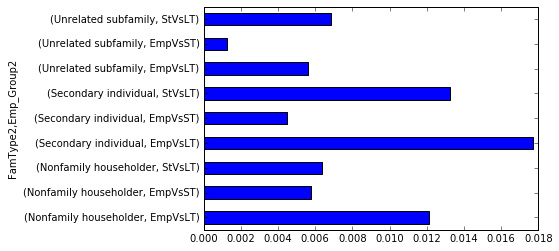

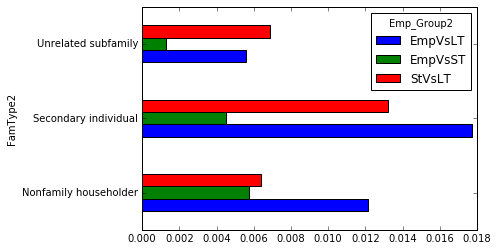

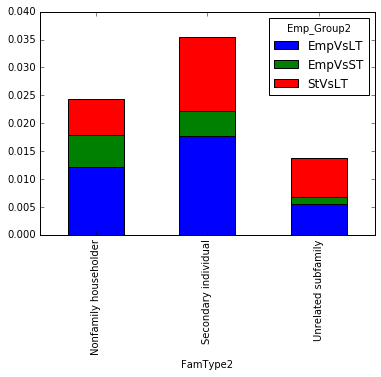

In [23]:
# Analysis, all 1 cell to setup function


#1. Table Percent of emp group belongs to each categorical group

df_FamType_2y=df_2y
LT_FamType2=df_FamType_2y.loc[:,['Emp_Group2','FamType2']]


pt2=pd.pivot_table(LT_FamType2,index=['Emp_Group2'],columns='FamType2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']
by_LT_FamType2_per2=pt3.stack()
by_LT_FamType2_per2


by_LT_FamType2_per2.sort_values(axis=0,ascending=True)


#########################################################################3


pt2=pd.pivot_table(df_FamType_2y,index=['Emp_Group2'],columns='FamType2',aggfunc='size', fill_value=0)
pt2['sum']=pt2.sum(axis=1)
pt3=pt2.div(pt2['sum'], axis=0)
del pt3['sum']

by_LT_FamType2_per2=pt3.stack()

print(pt3)


#### percent difference tables


pt4=pt3.T

pt4['EmpVsLT']=(pt4['Emped']-pt4['LongTerm']).abs()
pt4['EmpVsST']=(pt4['Emped']-pt4['ShortTerm']).abs()
pt4['StVsLT']=(pt4['ShortTerm']-pt4['LongTerm']).abs()

#############3
# try non abs for difference graph
##########3


pt4


del pt4['Emped']
del pt4['LongTerm']
del pt4['ShortTerm']


pt5=pt4.stack()

print(pt5)


# format percent options
#pd.options.display.float_format = '${:,.2f}'.format

# i want to sort not within subgroup

#######################33

# 3. Graphs comparing distribution of emp groups amoung categorical groups


########################################
########################################
## I want a difference graph
## bsh - I need to format graphs 
########################################
########################################


by_LT_FamType2_per2=pt4.stack()


by_LT_FamType2_per2.plot(kind='barh')
by_LT_FamType2_per2.unstack().plot(kind='barh')
by_LT_FamType2_per2.unstack().plot.bar(stacked=True)


#######################3

# 3. sorted table (differences) comparing distribution of emp groups amoung categorical groups

pt8=pt3.T

pt8['EmpVsLT']=pt8['Emped'].subtract(pt8['LongTerm'])
pt8['EmpVsST']=pt8['Emped'].subtract(pt8['ShortTerm'])
pt8['StVsLT']=pt8['ShortTerm'].subtract(pt8['LongTerm'])
#try .abs to compare differences

del pt8['Emped']
del pt8['LongTerm']
del pt8['ShortTerm']

#print(by_LT_Sex2_per2)
#print(pt4)
pt9=pt8.stack()
pt9.sort_values(axis=0, ascending=False)
print(pt9)

## can only sort within category
## want to know how to do all
############################################3



"\ngrfEDActeFam('ChildLesTh6')\ngrfEDActeFam('RelChildLesTh6')\ngrfEDActeFam('RelChildLesTh18')\ngrfEDActeFam('IncPercntFam')\ngrfEDActeFam('FamIncVsPov')\ngrfEDActeFam('wages')\ngrfEDActeFam('UnempComp')\ngrfEDActeFam('WorkComp')\ngrfEDActeFam('welfare')\ngrfEDActeFam('VetBen')\ngrfEDActeFam('DisabBen')\ngrfEDActeFam('ChildSup')\n"

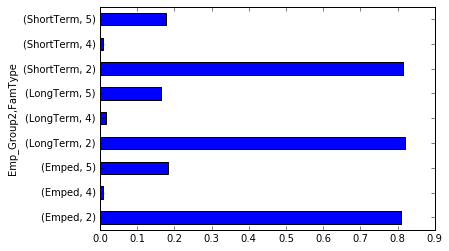

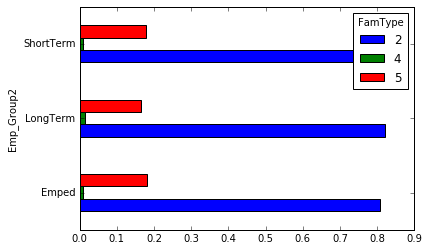

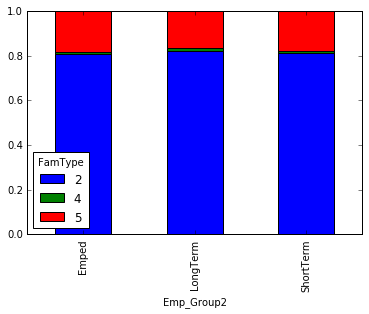

In [77]:
# Function to automate analysis for each variable

def grfEDActeFam(cvarn):
    df_cvarn_2y=df_2y
    LT_cvarn=df_cvarn_2y.loc[:,['Emp_Group2',cvarn]]
    pt2=pd.pivot_table(LT_cvarn,index=['Emp_Group2'],columns=cvarn,aggfunc='size', fill_value=0)
    pt2['sum']=pt2.sum(axis=1)
    pt3=pt2.div(pt2['sum'], axis=0)
    del pt3['sum']
    by_LT_cvarn_per2=pt3.stack()
    by_LT_cvarn_per2.plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot.bar(stacked=True)
    del df_cvarn_2y
    del LT_cvarn
    del pt2
    del pt3
    del by_LT_cvarn_per2

#grfEDActeFam('FamType2')
grfEDActeFam('FamType')

'''
grfEDActeFam('ChildLesTh6')
grfEDActeFam('RelChildLesTh6')
grfEDActeFam('RelChildLesTh18')
grfEDActeFam('IncPercntFam')
grfEDActeFam('FamIncVsPov')
grfEDActeFam('wages')
grfEDActeFam('UnempComp')
grfEDActeFam('WorkComp')
grfEDActeFam('welfare')
grfEDActeFam('VetBen')
grfEDActeFam('DisabBen')
grfEDActeFam('ChildSup')
'''

In [ ]:

# Haus categorical graphs macro
def grfEDAhaus(cvarn):
    df_cvarn_2y=df_2y
    LT_cvarn=df_cvarn_2y.loc[:,['Emp_Group2',cvarn]]
    pt2=pd.pivot_table(LT_cvarn,index=['Emp_Group2'],columns=cvarn,aggfunc='size', fill_value=0)
    pt2['sum']=pt2.sum(axis=1)
    pt3=pt2.div(pt2['sum'], axis=0)
    del pt3['sum']
    by_LT_cvarn_per2=pt3.stack()
    by_LT_cvarn_per2.plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot(kind='barh')
    by_LT_cvarn_per2.unstack().plot.bar(stacked=True)
    del df_cvarn_2y
    del LT_cvarn
    del pt2
    del pt3
    del by_LT_cvarn_per2

#grfEDActeFam('FamType2')

'''
grfEDAhaus('Hhtype')
grfEDAhaus('LivPlaceType')
grfEDAhaus('CountyFIPS')
grfEDAhaus('City')
grfEDAhaus('MetroSize')
grfEDAhaus('HausStatus')
grfEDAhaus('hhIncPerctiles')
grfEDAhaus('hhIncPerctiles2')
grfEDAhaus('Hhtype2')
'''

In [ ]:
#######################33
### Numeric Data analysis
#######################33

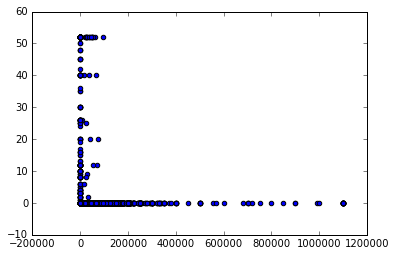

In [53]:
# 1. Scatter dot plot

########################################
########################################
## Take out 0s or NANs? 
## Some that imported as string might need reformatting to int
########################################
########################################

df_2y['wagesFamInc3'] = df_2y['wagesFamInc'].astype('int')

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.scatter(df_2y['wagesFamInc3'],df_2y['nwlkwk'])

# Eliminate edge observations?

'''
df8 = df7[np.isfinite(df7['UnempWks2'])]
df8 = df7[np.isfinite(df7['wagesFamInc4'])]
'''




# Histogram to compare the categorical variable distribution of the long-term unemployed and the rest of the population

([array([  9.09091736e-06,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00]),
  array([  9.09091736e-06,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00]),
  array([  8.80707459e-06,   2.43104537e-07,   2.18595360e-08,
           6.95530692e-09,   2.31843564e-09,   9.93615275e-10,
           1.98723055e-09,   6.62410183e-10,   6.62410183e-10,
           5.29928147e-09])],
 array([       0. ,   109999.9,   219999.8,   329999.7,   439999.6,
          549999.5,   659999.4,   769999.3,   879999.2,   989999.1,
         1099999. ]),
 <a list of 3 Lists of Patches objects>)

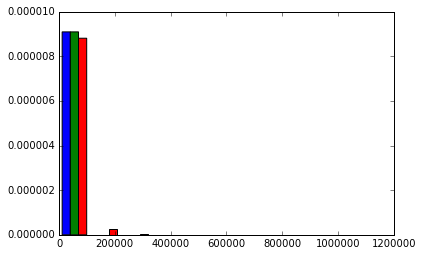

In [59]:
df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')


LTUmp = df_2y[df_2y['Emp_Group2'] == 'LongTerm']
STUmp = df_2y[df_2y['Emp_Group2'] == 'ShortTerm']
Emped_g = df_2y[df_2y['Emp_Group2'] == 'Emped']


LTUmpx=LTUmp['wagesFamInc4']
STUmpx=STUmp['wagesFamInc4']
NotLTUmpx=Emped_g['wagesFamInc4']


plt.hist([LTUmpx,STUmpx,NotLTUmpx], normed=True)

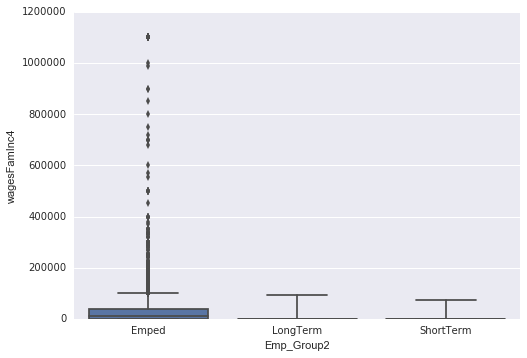

In [63]:
#3. boxplots


import seaborn as sns 

sns.boxplot(x=df_2y['Emp_Group2'], y=df_2y['wagesFamInc4'])
sns.despine()

# ?? nas causing this?

C:\Users\hillb\Anaconda3\lib\site-packages\ipykernel\__main__.py:50: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


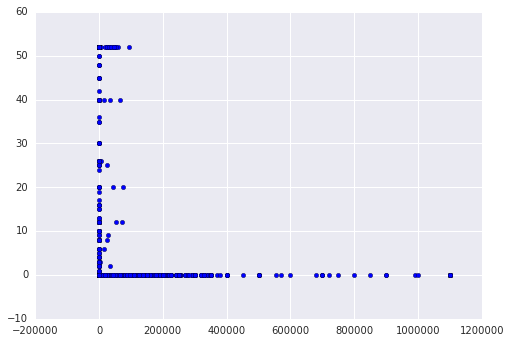

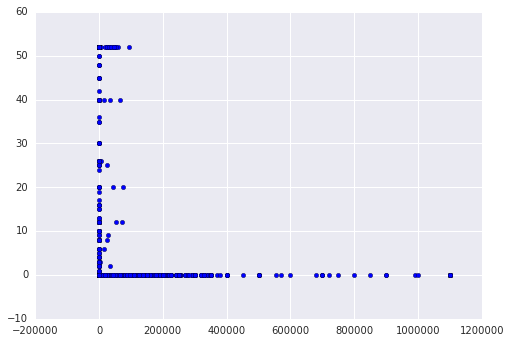

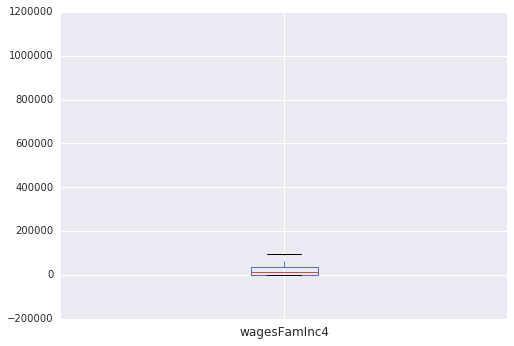

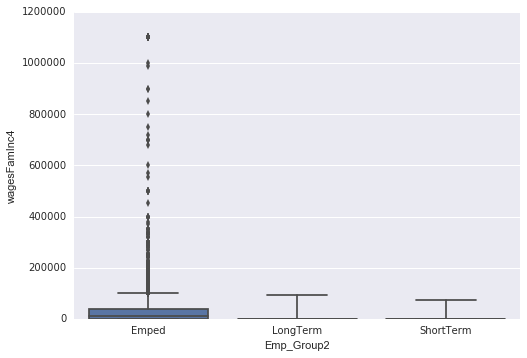

In [29]:
# All in one cell.  Set up function

##################################33
##################################33
#
#  why histograms not showing
#  Only printing some of the plots.  i want more!
#  maybe need plt on one plt2 ...
#
##################################33
##################################33



#1

df7=df_2y.loc[:,['wagesFamInc3','nwlkwk']]

df7['UnempWks2'] = df7['nwlkwk'].astype('float')
df7['wagesFamInc4'] = df7['wagesFamInc3'].astype('float')

df8 = df7[np.isfinite(df7['UnempWks2'])]
df8 = df7[np.isfinite(df7['wagesFamInc4'])]

fig=plt.figure()
ax2=fig.add_subplot(1,1,1)


ax2.scatter(df8['wagesFamInc4'],df8['UnempWks2'])

###################################

#3
fig=plt.figure()
ax3=fig.add_subplot(1,1,1)


ax3.scatter(df8['wagesFamInc4'],df8['UnempWks2'])


###################################

#4
df8.boxplot('wagesFamInc4')

###################################


#5
df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')

LTUmp = df_2y[df_2y['Emp_Group2'] == 'LongTerm']
STUmp = df_2y[df_2y['Emp_Group2'] == 'ShortTerm']
Emped_g = df_2y[df_2y['Emp_Group2'] == 'Emped']


LTUmpx=LTUmp['wagesFamInc4']
STUmpx=STUmp['wagesFamInc4']
NotLTUmpx=Emped_g['wagesFamInc4']

plt.hist([LTUmpx,STUmpx,NotLTUmpx], normed=True)

plt.plot()
plt.show()
###########################33

#6
import seaborn as sns
sns.boxplot(x=df_2y['Emp_Group2'], y=df_2y['wagesFamInc4'])
sns.despine()
##################################33

#7


LTUmp = df_2y[df_2y['Emp_Group2'] == 'LongTerm']
STUmp = df_2y[df_2y['Emp_Group2'] == 'ShortTerm']
Emped_g = df_2y[df_2y['Emp_Group2'] == 'Emped']

LTUmpx=LTUmp['wagesFamInc4']
STUmpx=STUmp['wagesFamInc4']
NotLTUmpx=Emped_g['wagesFamInc4']


plt.hist([LTUmpx,STUmpx,NotLTUmpx], normed=True)
#plt.hist.plot()
#plt.hist.show()
plt.show()

C:\Users\hillb\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


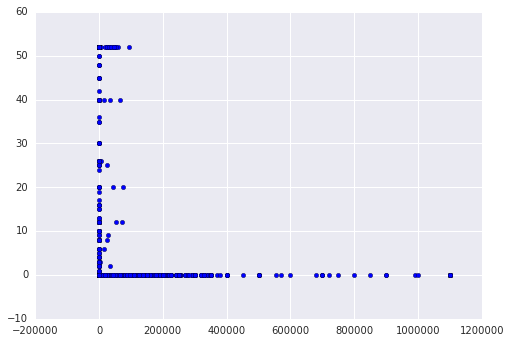

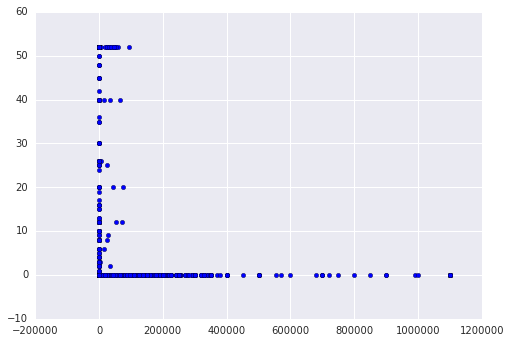

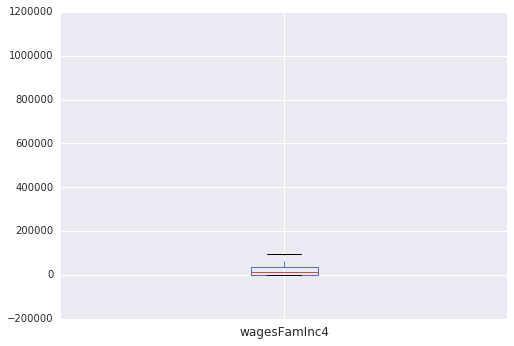

In [67]:


##################################33
##################################33
#
#  why histograms not showing
#  maybe need plt on one plt2 ...
#
##################################33
##################################33

#grfEDAFamNum('n4grph')


def grfEDAFamNum(carnum):
    #1
    df_2y3=df_2y
    df_2y3[carnum] = df_2y3[carnum].astype('int')
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    ax.scatter(df_2y3[carnum],df_2y3['nwlkwk'])


    ###################################

    #2
    df7=df_2y3.loc[:,[carnum,'nwlkwk']]

    df7['UnempWks2'] = df7['nwlkwk'].astype('float')
    df77=df7
    df77[carnum]=df7[carnum].astype('float')
    
    #df7[carnum+4] = df7['wagesFamInc3'].astype('float')

    df8 = df77[np.isfinite(df7['UnempWks2'])]
    df8 = df77[np.isfinite(df7[carnum])]

    
    fig=plt.figure()
    ax2=fig.add_subplot(1,1,1)


    ax2.scatter(df8[carnum],df8['UnempWks2'])


    ###################################

    #3
    fig=plt.figure()
    ax3=fig.add_subplot(1,1,1)


    ax3.scatter(df8[carnum],df8['UnempWks2'])


    ###################################

    #4
    df8.boxplot(carnum)
    ###################################

    
    #5
    
    
    ##########################
    # In functions?  Can you add a # to end of arg name.  concatenate strings?
    #df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')
    #
    ###################################
    LTUmp = df_2y3[df_2y3['Emp_Group2'] == 'LongTerm']
    STUmp = df_2y3[df_2y3['Emp_Group2'] == 'ShortTerm']
    Emped_g = df_2y3[df_2y3['Emp_Group2'] == 'Emped']


    LTUmpx=LTUmp[carnum]
    STUmpx=STUmp[carnum]
    NotLTUmpx=Emped_g[carnum]

    plt.hist([LTUmpx,STUmpx,NotLTUmpx], normed=True)
    
    plt.show()
    ###########################33

grfEDAFamNum('wagesFamInc4')

C:\Users\hillb\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


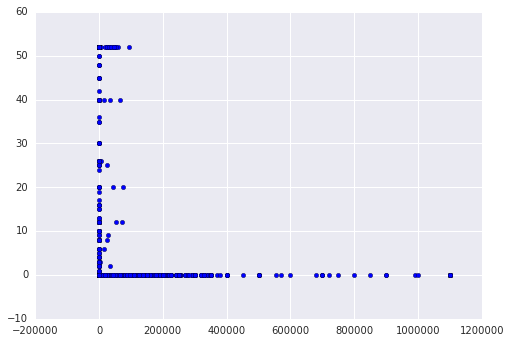

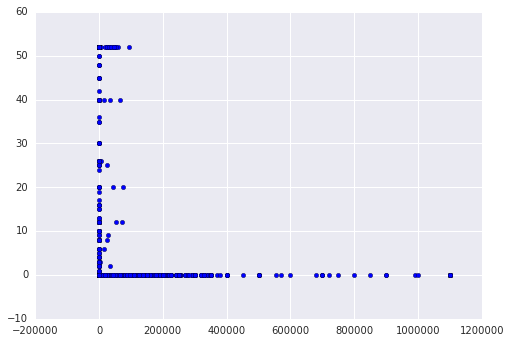

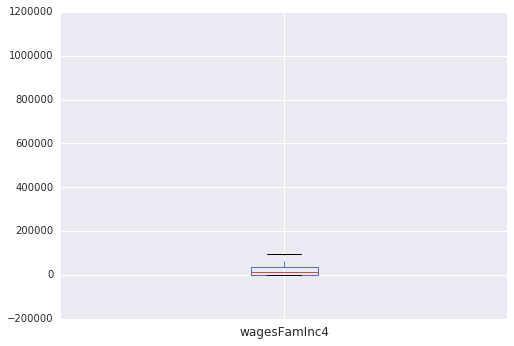

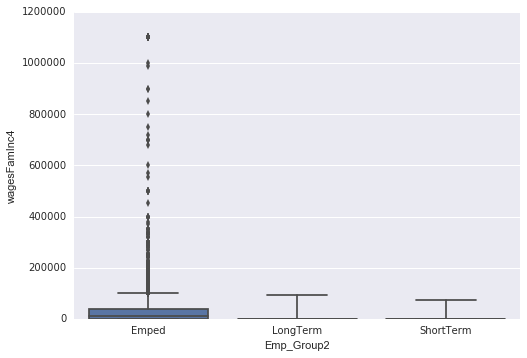

"\n\n\ngrfEDAFamNum('NumPerFam')\ngrfEDAFamNum('wagesFamInc')\ngrfEDAFamNum('FoodStmpAmt')\ngrfEDAFamNum('SchoolLunAmt')\ngrfEDAFamNum('HealthPrem')\ngrfEDAFamNum('HealthOutPock')\ngrfEDAFamNum('NumWeeksJobLook')\ngrfEDAFamNum('EarnLastJob')\ngrfEDAFamNum('LowIncStatus')\ngrfEDAFamNum('CovInsPriv8')\n"

In [66]:

##################################33
##################################33
#
#  why histograms not showing
#  maybe need plt on one plt2 ...
#
##################################33
##################################33


def grfEDAFamNum(carnum):
    #1
    df_2y3=df_2y
    df_2y3[carnum] = df_2y3[carnum].astype('int')
    #df_2y[carnum+3] = df_2y[carnum]
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    ax.scatter(df_2y3[carnum],df_2y3['nwlkwk'])


    ###################################

    #2
    df7=df_2y3.loc[:,[carnum,'nwlkwk']]

    df7['UnempWks2'] = df7['nwlkwk'].astype('float')
    df77=df7
    df77[carnum]=df7[carnum].astype('float')
    
    #df7[carnum+4] = df7['wagesFamInc3'].astype('float')

    df8 = df77[np.isfinite(df7['UnempWks2'])]
    df8 = df77[np.isfinite(df7[carnum])]



    
    fig=plt.figure()
    ax2=fig.add_subplot(1,1,1)


    ax2.scatter(df8[carnum],df8['UnempWks2'])


    ###################################

    #3
    fig=plt.figure()
    ax3=fig.add_subplot(1,1,1)


    ax3.scatter(df8[carnum],df8['UnempWks2'])


    ###################################

    #4
    df8.boxplot(carnum)

    ###################################


    #5

    #df_2y['wagesFamInc4'] = df_2y['wagesFamInc'].astype('int')

    LTUmp = df_2y3[df_2y3['Emp_Group2'] == 'LongTerm']
    STUmp = df_2y3[df_2y3['Emp_Group2'] == 'ShortTerm']
    Emped_g = df_2y3[df_2y3['Emp_Group2'] == 'Emped']


    LTUmpx=LTUmp[carnum]
    STUmpx=STUmp[carnum]
    NotLTUmpx=Emped_g[carnum]

    plt.hist([LTUmpx,STUmpx,NotLTUmpx], normed=True)

    plt.show()
    ###########################33

    #6
    import seaborn as sns
    sns.boxplot(x=df_2y3['Emp_Group2'], y=df_2y3[carnum])
    sns.despine()
    ##################################33

    #7


    LTUmp = df_2y[df_2y3['Emp_Group2'] == 'LongTerm']
    STUmp = df_2y[df_2y3['Emp_Group2'] == 'ShortTerm']
    Emped_g = df_2y[df_2y3['Emp_Group2'] == 'Emped']

    LTUmpx=LTUmp[carnum]
    STUmpx=STUmp[carnum]
    NotLTUmpx=Emped_g[carnum]


    plt.hist([LTUmpx,STUmpx,NotLTUmpx], normed=True)
    plt.show()

grfEDAFamNum('wagesFamInc4')

'''


grfEDAFamNum('NumPerFam')
grfEDAFamNum('wagesFamInc')
grfEDAFamNum('FoodStmpAmt')
grfEDAFamNum('SchoolLunAmt')
grfEDAFamNum('HealthPrem')
grfEDAFamNum('HealthOutPock')
grfEDAFamNum('NumWeeksJobLook')
grfEDAFamNum('EarnLastJob')
grfEDAFamNum('LowIncStatus')
grfEDAFamNum('CovInsPriv8')
'''

In [ ]:
grfEDAhausNum('Wages')
grfEDAhausNum('Uiearn')
grfEDAhausNum('WorkComp')
grfEDAhausNum('ssSocSec')
grfEDAhausNum('SuppInc')
grfEDAhausNum('PubAsst')
grfEDAhausNum('VetPay')
grfEDAhausNum('survivorPay')
grfEDAhausNum('diabPay')
grfEDAhausNum('RetireInc')
grfEDAhausNum('InterestInc')
grfEDAhausNum('DivInc')
grfEDAhausNum('EdInc')
grfEDAhausNum('ChSupp')
grfEDAhausNum('FinAssInc')
grfEDAhausNum('OthInc')


In [ ]:
# still need to add:
# breaking numeric into categories, then they can do the category graphs
# Categories that are numbers, plug them into and macro.  they can me numeric too!
# ASLO NEED TO DO, SUMMARY STATS?

# UPLOAD CURRENT BOOKS TO GIT HUB
# AS WELL AS OTHER WORK, XL SPREADSHEETS, CODEBOOK, ECT


## still need to do all the compare years workbook!
